# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Москвы проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Санкт-Петербурга. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Проверка гипотез в Python и результаты А/Б-теста  использования приложения Яндекс.Книги 
- Автор: Семин Андрей Геннадьевич
- Дата: 29.04.2025г.

## Цели и задачи проекта

Основной целью проекта является проверка гипотез и анализ результатов A/B-тестирования для пользователей таких продуктов как Яндекс.Книги и спортивного инвентаря компании BitMotion Kit.

## Описание данных

Данные расположены по адресу: `yandex_knigi_data.csv`  
В данных храниться следующая информация: 
- `city` - город (Москва или Санкт-петербург)
- `puid` - индентификатор пользователя
- `hours` - суммарное количество часов активности пользователя

## Содержимое проекта


* [1.1. Загрузка данных и знакомство с ними](#1_charter)
* [1.2. Проверка гипотезы в Python](#2_charter)
* [1.3. Аналитическая записка](#3_charter)
* [Часть 2. Анализ результатов A/B-тестирования](#4_charter)
* [2.2. Типы данных](#5_charter)
* [2.3. Наличие пропусков в данных](#6_charter)
* [2.4. Явные и неявные дубликаты в данных](#7_charter)
* [3. Фильтрация данных](#8_charter)
* [4. Категоризация данных](#9_charter)
* [5. Итоговый вывод](#10_charter)

---

<a class="anchor" id="1_charter"></a> 
## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `yandex_knigi_data.csv`.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [1]:
df = pd.read_csv('yandex_knigi_data.csv')

NameError: name 'pd' is not defined

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


В данных содержится 4 столбца, 3 из которых отражены в описании и 8784 строки. При этом пропусков в данных не наблюдается. 

In [49]:
#Рассмотрим информацию, которая находитс в таблице
df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


В столбце unnamed:0 расположены индексы, смысловой нагрузки в этом столбце нет.

In [50]:
#Проверим количество данных в разрезе на города, а также уникальность идентификаторов. 
display(df['city'].value_counts())
df['puid'].nunique()


Москва             6234
Санкт-Петербург    2550
Name: city, dtype: int64

8540

Суммарно в данных присуствует 8784 записи, при этом 6234 записи из Москвы и 2550 из Санкт-Петербурга. Уникальных идентификаторов при этом 8540. Следовательно, 244 пользователя представлены в двух городах или же возможно в данных присутствуют дубликаты.

In [51]:
display(df.duplicated(subset='puid'))
df.duplicated(subset='puid', keep = False).sum()

0       False
1       False
2       False
3       False
4       False
        ...  
8779     True
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

488

Так как 488 составляют малую часть и отразятся на проверке гипотезы (пользователи могут присуствовать в двух группах), стоит их удалить.

In [52]:
df = df.drop_duplicates(subset = 'puid', keep = False)

В данных осталось 8296 строк, проверим их распределение по городам.

In [53]:
display(df['city'].value_counts())
display('Разница в количестве пользователей между городами составляет:', df[df['city']=='Москва'].shape[0] - df[df['city']=='Санкт-Петербург'].shape[0])


Москва             5990
Санкт-Петербург    2306
Name: city, dtype: int64

'Разница в количестве пользователей между городами составляет:'

3684

Разница между Моской и Санкт-Петербургом в количестве пользователей составила 3684 пользователя. Это стоит учесть при проверке гипотезы.

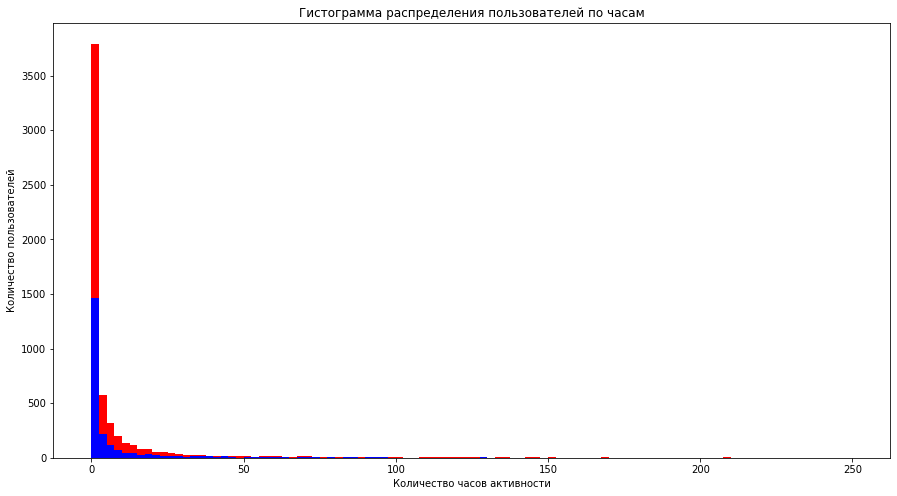

In [54]:
#Сравним как происходит распределение пользователей по суммарному количеству часов в приложении
x = df[df['city'] == 'Москва']
y = df[df['city'] == 'Санкт-Петербург']
plt.figure(figsize = (15,8))
x['hours'].hist(bins = 100, color = 'red', range = [0,250])
y['hours'].hist(bins = 100, color = 'blue', range = [0,250])
plt.xlabel('Количество часов активности')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма распределения пользователей по часам')
plt.grid()
plt.show()

In [55]:
# Посмотрим на статистические данные двух выборок: Москва и Санкт-Петербург
df[df['city'] == 'Москва'].describe()

,Unnamed: 0,puid,hours
count,5990.000000,5.990000e+03,5990.000000
mean,3124.419699,1.037652e+13,10.848192
std,1802.864265,1.077902e+14,36.925622
min,0.000000,9.668000e+03,0.000022
25%,1558.500000,3.140081e+08,0.057042
50%,3128.500000,8.757609e+08,0.888232
75%,4688.750000,1.517035e+09,5.933439
max,6233.000000,1.130000e+15,857.209373


In [56]:
df[df['city'] == 'Санкт-Петербург'].describe()

,Unnamed: 0,puid,hours
count,2306.000000,2.306000e+03,2306.000000
mean,7521.632697,5.391234e+12,11.264433
std,738.327494,7.787547e+13,39.831755
min,6234.000000,1.049230e+05,0.000025
25%,6879.750000,3.594025e+08,0.060173
50%,7532.500000,9.265005e+08,0.875355
75%,8162.750000,1.542720e+09,6.138424
max,8783.000000,1.130000e+15,978.764775


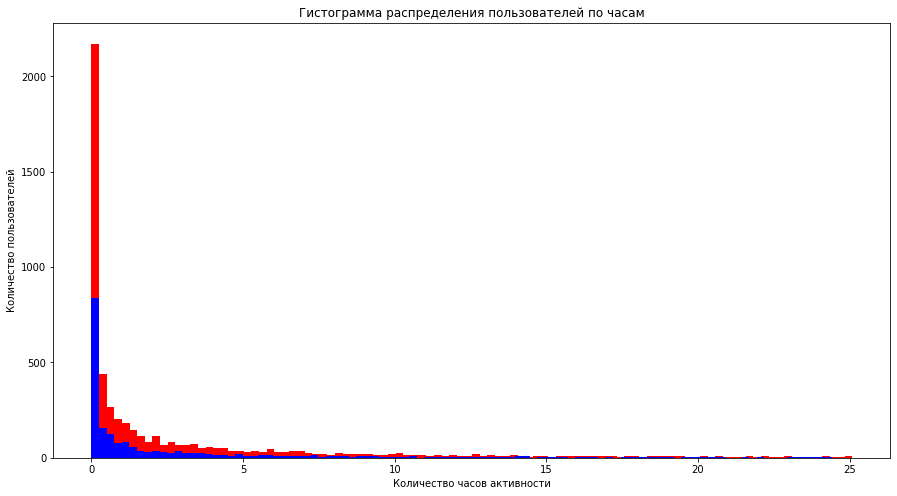

In [57]:
# В данных присуствуют значения, похожие на выбросы, из-зв чего проблематично оценить распределение
# Следует избавиться от них
x = df[(df['city'] == 'Москва')&(df['hours'] < df['hours'].quantile(0.9))]
y = df[(df['city'] == 'Санкт-Петербург') &(df['hours'] < df['hours'].quantile(0.9))]
plt.figure(figsize = (15,8))
x['hours'].hist(bins = 100, color = 'red')
y['hours'].hist(bins = 100, color = 'blue')
plt.xlabel('Количество часов активности')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма распределения пользователей по часам')
plt.grid()
plt.show()

Разница между выборками присутствует, это заметно не только в размерах выборок но и в статистических показателях: среднее значение, медиана, максимальное значение и т.д. 

Неравность выборок может исказить результаты при проверки гипотез. Однако, чтобы избежать проблем с проверкой гипотез стоит использовать t-test Уэлча. При рассмотрении гистограмм выборки ведут себя почти одинаково. Учитывая их размер, можно сказать что необходимые условия будут выполняется: выборки независимы, размер позволяет построить нормальное выборочное распределение так как соблюдается ЦПТ.

<a class="anchor" id="2_charter"></a> 
## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [58]:
# Для начала сравним средние значения часов и выявим разницу
df.groupby('city')['hours'].mean()

city
Москва             10.848192
Санкт-Петербург    11.264433
Name: hours, dtype: float64

Разница в средних часах активности присутвует и составляет 0.42 часа. Теперь стоит оценить насколько данный результат статистически значим. Вероятнось допустить ошибку первого рода возьмем равной 0.05 (так как результат не требует огромной точности).

In [59]:
metric_msc = df[df['city']=='Москва']['hours']
metric_spb = df[df['city']=='Санкт-Петербург']['hours']
alpha = 0.05
stat_test = ttest_ind(metric_spb, metric_msc, alternative = 'greater', equal_var = False)
display('pvalue = ', stat_test.pvalue)
if stat_test.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'pvalue = '

0.33179596018475044

'Не получилось отвергнуть нулевую гипотезу'

По результатам проведения t-теста Уэлча не получилось отвергнуть нулевую гипотезу, следовательно разница между средними часами активности использования приложения в Москве и в Санкт-Петербурге статистически незначима.

<a class="anchor" id="3_charter"></a> 
## 3. Аналитическая записка


В ходе работы над задачей проведена проверка гипотезы о том, что в Санкт-Петербурге пользователи более активно используют приложения.  
Первоначально были изучены данные и их распределение между городами, а также построены и изучены гистограммы рапсределения количества пользователей в зависимости от длительности суммарной активности пользователей.  
Из-за разности в количестве пользователей, распределенных между городами, а также наличию разницы в статистических показателях был выбран t-тест Уэлча, который позволяет проиводить статистическую оценку при различии дисперсий выборок.

В результате было получено, что средние значения в Санкт-Петерурге и Москве отличаются, при этом про проведении теста было получено значение pvalue = 0.33179596018475044, что выше заявленного уровня значимости.

Полученное значение указывает на то, что опровергнуть нулевую гипотезу нельзя и средняя активность пользователей Москвы и Санкт-Петербурга равны.

Возможной причиной отклонения результата может являтся неравенство количество пользователей по выборкам, так как наблюдается различие больше чем в два раза.

----

<a class="anchor" id="4_charter"></a> 
# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



**Цель:** запуск нового интерфейса для онлайн-магазина  
**Задачи: ** 
- проверить корректиность проведения А/В-тестирования
- проанализировать результаты
- сделать вывод о необходимости раскатывания фичи

**Техническое задание проведённого теста**
Предыдущий аналитик проверял полное обновление дизайна сайта. Гипотеза заключается в следующем: упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта.
Параметры теста:  
- название теста: interface_eu_test;
- группы: А (контрольная), B (новый интерфейс).
Вам нужно:  
- загрузить данные теста;
- проверить корректность его проведения;
- проанализировать полученные результаты.

Данные ab_test_participants.csv — таблица участников тестов.
Структура файла:  
- user_id — идентификатор пользователя;
- group — группа пользователя;
- ab_test — название теста;
- device — устройство, с которого происходила регистрация.

ab_test_events.zip — архив с одним csv-файлом, в котором собраны события 2020 года;  
Структура файла:  
- user_id — идентификатор пользователя;
- event_dt — дата и время события;
- event_name — тип события;
- details — дополнительные данные о событии.

## 2. Загрузите данные, оцените их целостность.


In [60]:
participants = pd.read_csv('ab_test_participants.csv')
events = pd.read_csv('ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [61]:
participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [62]:
# Проверим как распределяются значения в выборке по тестам, группам и устройствам
participants[['group', 'ab_test', 'device']].value_counts()

group  ab_test                  device 
A      interface_eu_test        Android    2445
B      interface_eu_test        Android    2414
                                PC         1418
A      interface_eu_test        PC         1346
       recommender_system_test  Android    1197
B      interface_eu_test        iPhone     1081
A      interface_eu_test        iPhone     1026
       recommender_system_test  PC          726
       interface_eu_test        Mac         566
       recommender_system_test  iPhone      554
B      interface_eu_test        Mac         554
       recommender_system_test  Android     428
A      recommender_system_test  Mac         270
B      recommender_system_test  PC          227
                                iPhone      197
                                Mac          76
dtype: int64

В выборке присутствуют два различных теста `interface_eu_test`,`recommender_system_test` при этом по каждому из проводится А/В-тестирование. Присутствуют 4 типа устройств - Android, PC, iPhone, Mac.

In [63]:
# Проверим целостность данных
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


Данные представлены 4 стобцами и 14525 строками. Пропусков в данных нет, все типы определены корректно.

In [64]:
#Проверим данные другого датасета
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


В данных присутствует информаия о пользователях и их действиях. Следует изучить какие существует названия событий. КРоме того, существуют записи GLOBAL, которые вероятнее всего являются технической записью для всех пользователей - начало акции, конец акции, рассылка и т.д.

In [65]:
events['event_name'].value_counts()

login                                 248285
product_page                          195606
registration                          144183
purchase                              104836
product_cart                           94373
Start of Christmas&New Year Promo          1
End of Black Friday Ads Campaign           1
Start of CIS New Year Gift Lottery         1
Name: event_name, dtype: int64

В логах присуствуют следующие варианты событий: регистрация, логин(вход)б открытие страницы продукта, покупка, открытие карточки продукта. Из первичного расмотрения данных заметно, что первостепенно происхоидт регистрация, а потом вход. Учитывая количество логов связанных с открытием карточки товара, возможно карточка товара открывается после покупки и хранит в себе дополнительную информацию о заказанном товаре, так как ее отрытие реже чем покупка.

In [66]:
#Оценка целостности данных
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


Типы данных определены верно. Всего в данных присуствуют 4 столбца и 787286 строк. Пропуски есть только в поле details, в котором хранится дополнительная информация. Для анализа и выполнения задач она не представляет особый интерес, поэому пропуски можно оставить незаполненными.

В целом при рассмотрении данных можно сказать о том, что они целостны (исключение - поле details). Данные подходят для анализа и проведения А/В-тестирования.

In [67]:
display(participants.duplicated(subset = ['user_id', 'ab_test', 'group'], keep = 'first').sum())
display(events.duplicated(subset = ['user_id', 'event_dt', 'event_name'],keep = 'first').sum())
participants = participants.drop_duplicates(subset=['user_id', 'ab_test', 'group'])
events = events.drop_duplicates(subset=['user_id', 'event_dt', 'event_name'])

0

39510

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

Из технического задания известно: название теста: interface_eu_test;
группы: А (контрольная), B (новый интерфейс).

In [68]:
#Проверим присуствует ли такой тест и такие группы
participants[participants['ab_test'] == 'interface_eu_test']['group'].value_counts()

B    5467
A    5383
Name: group, dtype: int64

В соотвествии с требованием технического задания в данных присуствуют указаный тест и группы, других групп нет. При этом данные распределились следующим образом группа А (контрольная) - 5383 пользователя, группа В (новый интерфейс) - 5467. Разница в абсолютных значениях составляет 84 человека. Стоит оценить это в процентном соотношении.

Перед оценкой стоит также проверить что пользователи не попали случайно в разные группы и при этом не приняли участия в двух разных тестах.

Учитывая что мы знаем распределение по группам, можем оценить количество уникальных идентификаторов данных группах, если оно будет отличаться от суммы пользователей двух групп, значит присуствует те, кто попал в обе группы.

In [69]:
participants[participants['ab_test'] == 'interface_eu_test']['user_id'].nunique()

10850

В тесте приняло участие 10850 уникальных пользователей, при этом все они распределены либо в группу А либо в В. Таким образом нет пользователей, которые приняли участие в тесте в двух разных группах. Так как одновременно было проведена два различных теста, стоит проверить что пользователи не пересеклись в них.

In [70]:
interface_eu_test = participants[participants['ab_test'] == 'interface_eu_test']['user_id']
recommender_system_test = participants[participants['ab_test'] == 'recommender_system_test']['user_id']
intersection = list(set(interface_eu_test) & set(recommender_system_test ))
display(intersection)
display(len(intersection))

['8D406B3B500671BD',
 '701B5B6292603C20',
 '963B1853B52C27E5',
 '6786C23A54D59DD4',
 '3B6ABE8E7872977E',
 '75013CAAF42E90A9',
 '21C2D41E1FDF1E70',
 '3B62EE83708770A5',
 '8C0361CB080810CA',
 '24553DD3FF973EE4',
 '9918D1C354A1383A',
 '02894A55BC14A70E',
 'AFF3D30CC385F0E9',
 'FF44696E39039D29',
 'D7A2C421522E93A4',
 '3A6D88AB973BD99D',
 '51DA2C882D0D7508',
 '94464DF2E5398E26',
 'B60B4563ADC259E3',
 'C4D48357F1C18C76',
 '84DC74ED5E60BA6A',
 '902F92052587344F',
 '3F775ABC71333988',
 '95401934D6D6D4FC',
 'CF849D6380A28CA9',
 'C89E24F4C723CEF4',
 'AA5A1803D3FA76B4',
 'C4F3A9D7BB596E6E',
 'AFFC4117AC279D49',
 'A0BAE4190D41A285',
 'A8C25A605F613665',
 'E3780F6861A69868',
 '1A4A33FE1C0FDD90',
 '9431D6C9475CFD3A',
 '48BEDF1889241425',
 'B3059CB4FD2DE0FA',
 '051D59BC38C3B3AA',
 'C165E8C0C5DE19FF',
 '27802765D2458B2B',
 'A71444B5BEB5CCC4',
 '50CF32FEE0C61DA9',
 '0CA93D3A4A1D8389',
 'A980A65F42FB1BB4',
 'E77F99BCF9D8AB96',
 'DC41AFF8213BE01A',
 'AEB9B39AE54D3598',
 'BD31CABB6D5C6561',
 '6F70F06DD20

887

При проверке пересечений между разными тестами найдено 887 пользователей, которые приняли участие одновременно в двух тестах. Следовательно выборки перестает быть независимой в данном случае, так как результаты другого теста также могли повлиять на результат. Для дальнейшей работы их необходимо исключить из выборки.

In [71]:
participants = participants[~participants['user_id'].isin(intersection)]

Так как результаты второго теста в задании не спрашиваются и необходимо оценить только тест с интерфейсом, оставим данные только  о нем.

In [72]:
participants_ab = participants[participants['ab_test'] == 'interface_eu_test']

Теперь оценим процентное соотношение распределения количества пользователей между группами. 

In [73]:
100 * participants_ab[participants_ab['group'] == 'A']['user_id'].nunique()/participants_ab['user_id'].nunique(), 100 * participants_ab[participants_ab['group'] == 'B']['user_id'].nunique()/participants_ab['user_id'].nunique()

(49.70390444645187, 50.29609555354813)

<AxesSubplot:ylabel='Количество пользователей'>

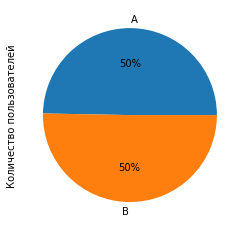

In [74]:
participants_ab.groupby('group')['user_id'].nunique().plot(kind = 'pie', ylabel = 'Количество пользователей', autopct='%1.0f%%')

Результаты проверки распределения пользователе по группам демонстрирует, что разница не велика в группе А - 49,7% в группе В - 50,3%. Разницей можно принебречь, так как группы распределилсь почти одинаково.

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [75]:
ab_test_events = pd.merge(participants_ab, events, on = 'user_id', how = 'inner')

In [76]:
ab_test_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67582 entries, 0 to 67581
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     67582 non-null  object        
 1   group       67582 non-null  object        
 2   ab_test     67582 non-null  object        
 3   device      67582 non-null  object        
 4   event_dt    67582 non-null  datetime64[ns]
 5   event_name  67582 non-null  object        
 6   details     18372 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 4.1+ MB


Полученный датасет представляет собой 7 столбцов и 73815 строк.

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [77]:
#Для начала создадим отдельный датасет с датами регистраций
reg = ab_test_events[ab_test_events['event_name'] == 'registration'][['user_id','event_dt']]
reg.columns = ['user_id', 'registration']

In [78]:
# Объединим датасеты для дальнейшей работы
ab_test_event = pd.merge(reg, ab_test_events, on = 'user_id', how = 'inner')
ab_test_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67582 entries, 0 to 67581
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       67582 non-null  object        
 1   registration  67582 non-null  datetime64[ns]
 2   group         67582 non-null  object        
 3   ab_test       67582 non-null  object        
 4   device        67582 non-null  object        
 5   event_dt      67582 non-null  datetime64[ns]
 6   event_name    67582 non-null  object        
 7   details       18372 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 4.6+ MB


In [79]:
#Добавим новое поле lifetime
ab_test_event['lifetime'] = (ab_test_event['event_dt'] - ab_test_event['registration']).dt.days
ab_test_event['lifetime'].value_counts()

0     34407
1      7512
2      5146
3      3809
4      2969
5      2526
6      2042
7      1760
8      1461
9      1164
10     1033
11      710
12      625
13      545
14      469
15      381
16      296
17      203
19      174
18      170
20       83
21       70
22       27
Name: lifetime, dtype: int64

После добавления отдельного столбца видно, что в представленных данных максимальный лайфтайм равен 22 дням.

In [80]:
# По условиям задачи нужно выбрать только те события, которые присходили спустя 7 дней после регистрации
ab_test_event_7days = ab_test_event[ab_test_event['lifetime'] < 7]
display(ab_test_event_7days.info())
ab_test_event_7days['group'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58411 entries, 0 to 67581
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       58411 non-null  object        
 1   registration  58411 non-null  datetime64[ns]
 2   group         58411 non-null  object        
 3   ab_test       58411 non-null  object        
 4   device        58411 non-null  object        
 5   event_dt      58411 non-null  datetime64[ns]
 6   event_name    58411 non-null  object        
 7   details       15519 non-null  object        
 8   lifetime      58411 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 4.5+ MB


None

B    29682
A    28729
Name: group, dtype: int64

В выборку 7 дней вошло 58411 записей о пользователях. При этом записи распределились также почти одинаково.

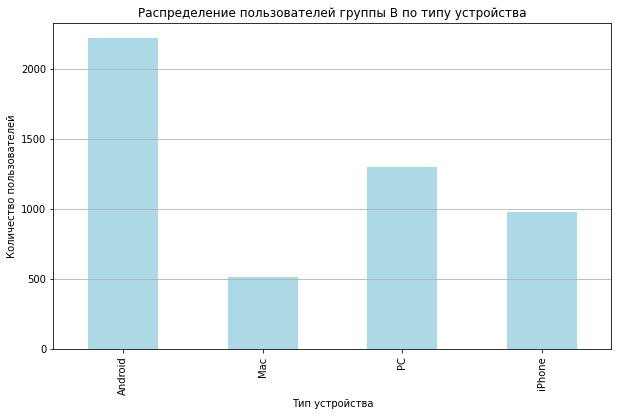

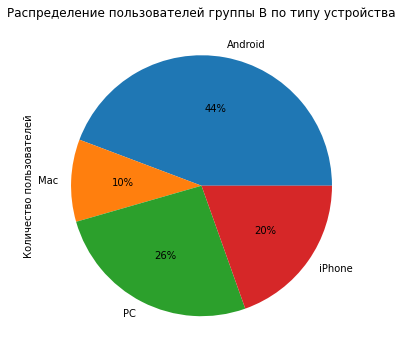

In [81]:
#Оценим как пользователи разделились по группам и используемым устройствам
ab_test_event_7days[ab_test_event_7days['group'] == 'B'].groupby('device')['user_id'].nunique().plot(kind ='bar',
                                                                                           color = 'lightblue',
                                                                                           figsize = (10,6),
                                                                                           xlabel = 'Тип устройства',
                                                                                           ylabel = 'Количество пользователей',
                                                                                           title = 'Распределение пользователей группы B по типу устройства')
plt.grid(axis = 'y')
plt.show()
ab_test_event_7days[ab_test_event_7days['group'] == 'B'].groupby('device')['user_id'].nunique().plot(kind ='pie',
                                                                                           figsize = (10,6),
                                                                                           ylabel = 'Количество пользователей',
                                                                                           title = 'Распределение пользователей группы B по типу устройства',
                                                                                         autopct='%1.0f%%')
plt.show()

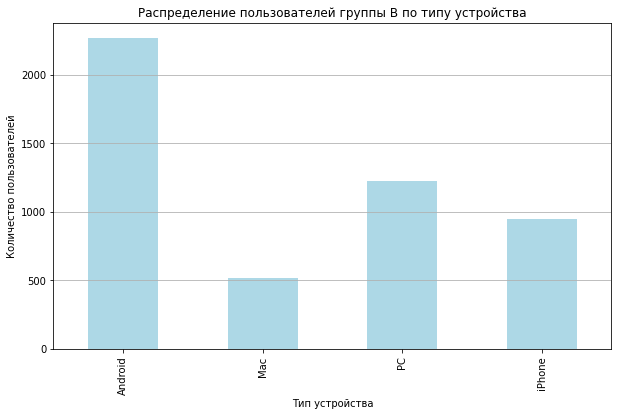

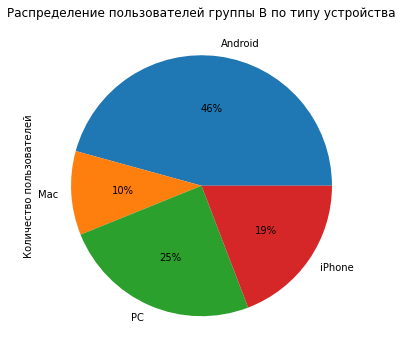

In [82]:
#Оценим как пользователи разделились по группам и используемым устройствам
ab_test_event_7days[ab_test_event_7days['group'] == 'A'].groupby('device')['user_id'].nunique().plot(kind ='bar',
                                                                                           color = 'lightblue',
                                                                                           figsize = (10,6),
                                                                                           xlabel = 'Тип устройства',
                                                                                           ylabel = 'Количество пользователей',
                                                                                           title = 'Распределение пользователей группы B по типу устройства')
plt.grid(axis = 'y')
plt.show()
ab_test_event_7days[ab_test_event_7days['group'] == 'A'].groupby('device')['user_id'].nunique().plot(kind ='pie',
                                                                                           figsize = (10,6),
                                                                                           ylabel = 'Количество пользователей',
                                                                                           title = 'Распределение пользователей группы B по типу устройства',
                                                                                         autopct='%1.0f%%')
plt.show()

По результатам изучения данных распределение почти одинаково. Следовательно выборки репрезентабельны.

Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [83]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Задаём параметры
base_CR = 0.3
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1 - 0.2  # Мощность теста
mde = 0.1  # Минимальный детектируемый эффект
new_CR = base_CR * (1+mde)
effect_size = proportion_effectsize(base_CR, new_CR)
# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")
print(f"Суммарный объем выборки равен: {int(sample_size)*2}")

Необходимый размер выборки для каждой группы: 3761
Суммарный объем выборки равен: 7522


In [84]:
ab_test_event_7days.groupby('group')['user_id'].nunique()

group
A    4952
B    5011
Name: user_id, dtype: int64

Полученные выборки достаточны для оценки результата.

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [85]:
# Вернемся к датусету покупателей и проверим кто хотя бы раз совершил покупку
purchasers = ab_test_event_7days[ab_test_event_7days['event_name'] == 'purchase']['user_id'].unique()


In [86]:
purchasers = ab_test_event_7days[ab_test_event_7days['event_name'] == 'purchase']['user_id'].unique()
user_pur = participants_ab.copy()
user_pur ['ispur?'] = user_pur['user_id'].isin(purchasers)
metrics = user_pur.groupby('group').agg({'user_id':'nunique', 'ispur?':'sum'})
metrics['CR'] = metrics['ispur?'] / metrics['user_id']  * 100
metrics

,user_id,ispur?,CR
group,,,
A,4952,1377,27.806947
B,5011,1480,29.535023


В контрольной группе конверсия составила 27,8%, в тестовой - 29,5%. Разница в процентном соотношении составила 1,7%, в абсолютном - 103 человека. В данном случае приведена информация о первой неделе использования онлайн-магазина после реагистрации. Относительно контрольной группы, конверсия тестовой увеличилась на 6,11%.

- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

Предварительный вывод: Новый интерфейс положительно влияет на конверсию, однако стоит его оценить насколько он статистически значим. На данный момент улучшение демонстрируется в 6.11% по сравнению с предыдущим вариантом

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Гипотеза:  
Н0: Новый интерфейс не повлиял на конверсию в покупку (CR_A = CR_B)  
Н1: Новый интерфейс увеличил конверсию в покупку (CR_A < CR_B)

In [87]:
from statsmodels.stats.proportion import proportions_ztest
successes = [1480, 1377]  
total_users = [5011, 4952] 
z_stat, p_value = proportions_ztest(successes, total_users, alternative = 'larger')
print(f"Z-test: {z_stat:.2f}")
print(f"pvalue: {p_value:.4f}")
if p_value < 0.05:
    print("Отклоняем нулевую гипотезу, различия статистчисеки значимы")
else:
    print("Различия незначимы, нет причин отклонить нулевую гипотезу.")

Z-test: 1.91
pvalue: 0.0283
Отклоняем нулевую гипотезу, различия статистчисеки значимы


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

В ходе изучения различий замечено что новый интерфейс положительно влияет на показатель конверсии (увеличение в 6,11% от старых показателей). При проведении теста для проверки значимости отличий получены следующие результаты:
- Z-test: 1.91
- pvalue: 0.0283

Нулевая гипотеза о равенстве показателей отклонена, так как значение pvalue больше чем значение уровня значимости (ошибки первого рода). При этом Z-test демострирует положительное значение, что говорит о большем значение показателя в группе В, чем в А. 

Внедрение нового интерфейса положительно сказывает на показателях, следует развернуть новый интерфейс для всех пользователей.